In [1]:
import sys, os

In [2]:
def get_root_path(n):
    '''
    Esta función nos permite iterar sobre carpetas para añadir el path de nuestra carpeta raíz
    Argumentos:
        - n (int): el número de veces que iteraremos para llegar a la carpeta deseada
    '''
    path = os.getcwd() # para notebook ||| __file__ --> para .py
    for i in range(n):
        path = os.path.dirname(path)
        print('---------------')
        print(path)
        print('---------------')
    sys.path.append(path)

get_root_path(n=1)
print()
sys.path

---------------
/Users/valdecantos/Documents/The_Bridge/Alumno_Folder/Alumno_Curso/datascience_thebridge_9_21/Proyecto ML/SRC
---------------



['/Users/valdecantos/Documents/The_Bridge/Alumno_Folder/Alumno_Curso/datascience_thebridge_9_21/Proyecto ML/SRC/Notebooks',
 '/Users/valdecantos/.vscode/extensions/ms-toolsai.jupyter-2021.10.1101450599/pythonFiles',
 '/Users/valdecantos/.vscode/extensions/ms-toolsai.jupyter-2021.10.1101450599/pythonFiles/lib/python',
 '/Library/Frameworks/Python.framework/Versions/3.7/lib/python37.zip',
 '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7',
 '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload',
 '',
 '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages',
 '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/extensions',
 '/Users/valdecantos/.ipython',
 '/Users/valdecantos/Documents/The_Bridge/Alumno_Folder/Alumno_Curso/datascience_thebridge_9_21/Proyecto ML/SRC']

In [4]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from Utils.preprocesado1 import preprocesado as prep1

In [6]:
trenes = pd.read_csv("/Users/valdecantos/Documents/The_Bridge/Alumno_Folder/Alumno_Curso/datascience_thebridge_9_21/Proyecto ML/SRC/Data/RAW/viajes-en-tren-sample.csv")
trenes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   company        1000000 non-null  object 
 1   origin         1000000 non-null  object 
 2   destination    1000000 non-null  object 
 3   departure      1000000 non-null  object 
 4   arrival        1000000 non-null  object 
 5   duration       1000000 non-null  float64
 6   vehicle_type   1000000 non-null  object 
 7   vehicle_class  1000000 non-null  object 
 8   price          1000000 non-null  float64
 9   fare           1000000 non-null  object 
 10  seats          1000000 non-null  int64  
 11  meta           1000000 non-null  object 
 12  insert_date    1000000 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 99.2+ MB


In [7]:
DF_modificado = prep1(trenes);

/Users/valdecantos/Documents/The_Bridge/Alumno_Folder/Alumno_Curso/datascience_thebridge_9_21/Proyecto ML/SRC/Utils/preprocesado1.py:39: FutureWarning: The default value of regex will change from True to False in a future version.
  df['vehicle_type'] = df['vehicle_type'].str.replace('REGIONAL.','REG.EXP')
/Users/valdecantos/Documents/The_Bridge/Alumno_Folder/Alumno_Curso/datascience_thebridge_9_21/Proyecto ML/SRC/Utils/preprocesado1.py:41: FutureWarning: The default value of regex will change from True to False in a future version.
  df['vehicle_type'] = df['vehicle_type'].str.replace('REG.EXP.','REG.EXP')


In [9]:
X = DF_modificado[['duration','seats','origin_le','destination_le','vehicle_type_le','vehicle_class_le','fare_le','Month','Day','Day of the week','Hour']]
y = DF_modificado["price"]

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score

model = LinearRegression(n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

model.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [6]:
print("MSE", mean_squared_error(y_test, model.predict(X_test)))
print("RMSE", np.sqrt(mean_squared_error(y_test, model.predict(X_test))))
print("MAE", mean_absolute_error(y_test, model.predict(X_test)))
print('R2 score', r2_score(y_test, model.predict(X_test)))

MSE 245.8446582899709
RMSE 15.679434246488963
MAE 12.354495718693947
R2 score 0.35535064593416743


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

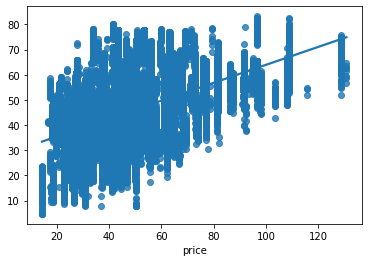

In [11]:
sns.regplot(y_test, model.predict(X_test))

In [ ]:
import pickle

filename = 'trenes_lineal_Reg_model'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(model, archivo_salida)